In [206]:
import pandas as pd
from sklearn.datasets import load_iris

In [207]:
data = load_iris()
dataset = pd.DataFrame(data=data["data"], columns=data["feature_names"])
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [208]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [209]:
from sklearn.model_selection import train_test_split

x = dataset.copy()
y_temp = data['target']
y = []

for i in range(len(y_temp)):
    if y_temp[i] == 0:
        y.append(data["target_names"][0])
    elif y_temp[i] == 1:
        y.append(data["target_names"][1])
    elif y_temp[i] == 2:
        y.append(data["target_names"][2])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
y

['setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',


In [210]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [211]:
predictions = clf.predict(X_test)
print(predictions)

['setosa' 'setosa' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'versicolor' 'virginica' 'virginica' 'virginica'
 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'virginica'
 'setosa' 'virginica' 'virginica' 'setosa' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'setosa' 'virginica' 'virginica'
 'setosa' 'virginica' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica'
 'virginica' 'versicolor' 'virginica' 'setosa' 'setosa' 'setosa']


In [212]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.92

In [213]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=['setosa', 'versicolor', 'virginica'])

array([[19,  0,  0],
       [ 0,  8,  1],
       [ 0,  3, 19]], dtype=int64)

In [214]:
from sklearn.metrics import precision_score
print('Setosa Precision: ' + str(precision_score(y_test, predictions, labels=['setosa'], average='weighted')))
print('Versicolor Precision: ' + str(precision_score(y_test, predictions, labels=['versicolor'], average='weighted')))
print('Virginica Precision: ' + str(precision_score(y_test, predictions, labels=['virginica'], average='weighted')))

Setosa Precision: 1.0
Versicolor Precision: 0.7272727272727273
Virginica Precision: 0.95


In [215]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['setosa', 'versicolor', 'virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.73      0.89      0.80         9
   virginica       0.95      0.86      0.90        22

    accuracy                           0.92        50
   macro avg       0.89      0.92      0.90        50
weighted avg       0.93      0.92      0.92        50



In [216]:
clf.feature_importances_

array([0.02968086, 0.02281716, 0.00651919, 0.9409828 ])

In [217]:
feature_importances = pd.DataFrame(clf.feature_importances_, index=x.columns).sort_values(0, axis=0, ascending=False)
feature_importances

,0
petal width (cm),0.940983
sepal length (cm),0.029681
sepal width (cm),0.022817
petal length (cm),0.006519


<AxesSubplot:>

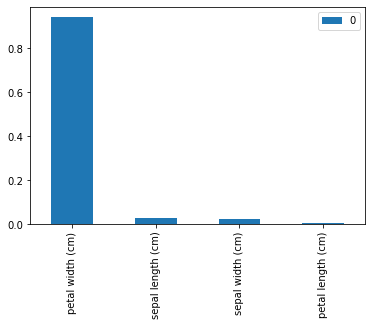

In [218]:
feature_importances.head(10).plot(kind='bar')

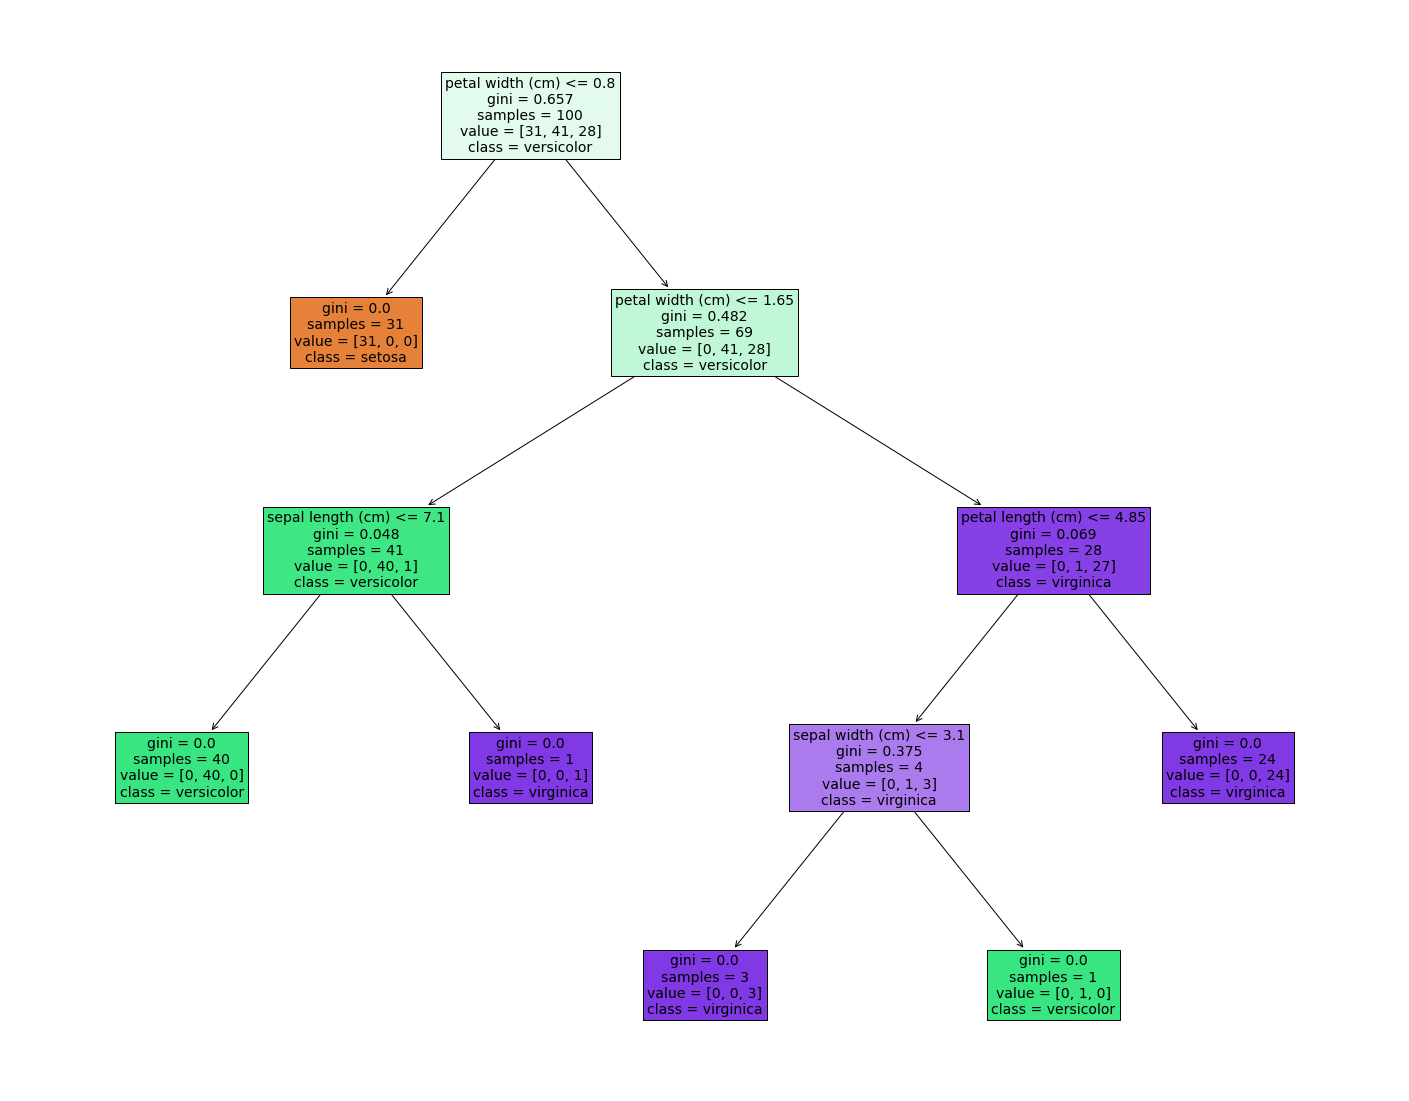

In [219]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(clf,
                    feature_names=x.columns,
                    class_names={0: "setosa", 1: "versicolor", 2: "virginica"},
                    filled=True,
                    fontsize=14)